# Generalized Linear Models

## Logit Models

In [61]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm

from plotnine import *

# import data set, set directory
home_dir = "/home/tobias_giesemann/Dropbox/Uni_Master/02SS19/01Advanced_Statistical_Modelling/Essay/"

# using pandas dataframe as a similar data structure to R dataframes
allbus_df = pd.read_csv(home_dir+"data/allbus_full.csv")
print("full data set: ", allbus_df.shape)
allbus_df = allbus_df[["eastwest","sex","age","lt15"]]
allbus_df.contacts = allbus_df.lt15
allbus_df["any_contact"] = 0
allbus_df.loc[allbus_df.contacts >0, "any_contact"] = 1

print(allbus_df.contacts.unique())
print(allbus_df.any_contact.unique())


#show head
allbus_df.head()


full data set:  (3490, 793)
[nan  1.  2.  4.  3.  6.  5.  9.  8. 12.  7. 18. 11. 10.]
[0 1]


/home/tobias_giesemann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app.launch_new_instance()


,eastwest,sex,age,lt15,any_contact
0,NEUE BUNDESLAENDER,FRAU,47.0,NaN,0
1,NEUE BUNDESLAENDER,MANN,52.0,NaN,0
2,ALTE BUNDESLAENDER,MANN,61.0,1.0,1
3,ALTE BUNDESLAENDER,FRAU,54.0,NaN,0
4,ALTE BUNDESLAENDER,MANN,71.0,NaN,0


/home/tobias_giesemann/.local/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/tobias_giesemann/.local/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/tobias_giesemann/.local/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 1756 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


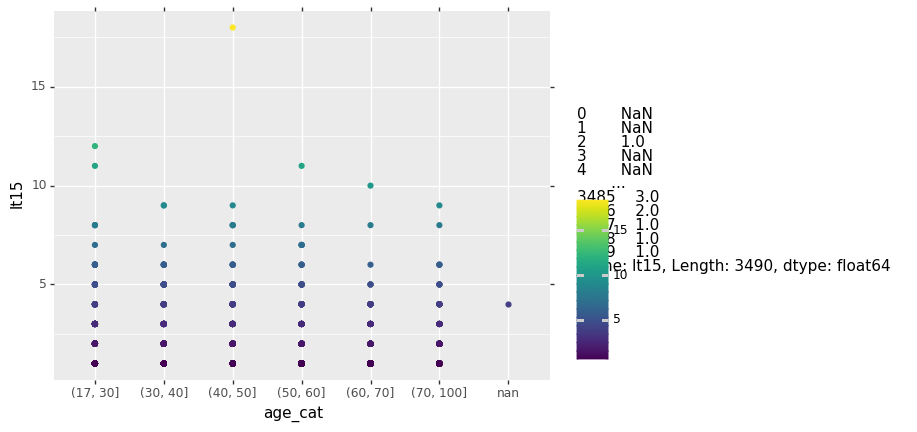

<ggplot: (8771815829859)>

In [58]:
allbus_df["age_cat"] = pd.cut(allbus_df.age, [17,30,40,50,60,70,100])

(ggplot(data = allbus_df, 
       mapping = aes(x = "age_cat",
                    y = "lt15"))
 +geom_point(mapping=aes(color=allbus_df["lt15"]))
)


## Probit Modell

In [79]:
# Probit Modell als GLM


probit_model = glm("any_contact ~ age + sex + eastwest", data = allbus_df, family = sm.families.Binomial(link=sm.families.links.probit)).fit()
print(probit_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            any_contact   No. Observations:                 3486
Model:                            GLM   Df Residuals:                     3482
Model Family:                Binomial   Df Model:                            3
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2288.8
Date:                Thu, 25 Jul 2019   Deviance:                       4577.6
Time:                        22:18:47   Pearson chi2:                 3.49e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/home/tobias_giesemann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


## Logit Modell

In [88]:
#selbiges Modell wie oben
logit_model = glm("any_contact ~ age + sex + eastwest", data = allbus_df, 
                  family = sm.families.Binomial(link=sm.families.links.logit # or None, da logit default für Binomialfamilie
                                                )).fit()
print(logit_model.summary())

print("Maximal beobachtbare Effekte der Einflussgrößen: \n",0.25*logit_model.params)
print("Multiplikative Effektinterpretation: \n", (np.exp(logit_model.params)-1)*100)

# Margins konnten leider nicht herausgearbeitet werden, da ist die Dokumentation unvollständig, 
# allerdings funktioniert es für das logit modell über einen Umweg:

logit_model2 = logit("any_contact ~ age + sex + eastwest", allbus_df).fit()
print(logit_model2.summary())

margins = logit_model2.get_margeff().summary_frame()
print(margins)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            any_contact   No. Observations:                 3486
Model:                            GLM   Df Residuals:                     3482
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2288.7
Date:                Thu, 25 Jul 2019   Deviance:                       4577.5
Time:                        22:33:19   Pearson chi2:                 3.49e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/home/tobias_giesemann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


## Poisson -Regression

In [99]:
#selbiges Modell wie oben
logit_model = glm("lt15 ~ age + sex + eastwest", data = allbus_df, 
                  family = sm.families.Poisson()).fit()
print(logit_model.summary())

print("Multiplikative Effektinterpretation: \n", (np.exp(logit_model.params)-1)*100)



                 Generalized Linear Model Regression Results                  
Dep. Variable:                   lt15   No. Observations:                 1733
Model:                            GLM   Df Residuals:                     1729
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.5
Date:                Thu, 25 Jul 2019   Deviance:                       1447.2
Time:                        23:28:51   Pearson chi2:                 1.85e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Hier funktioniert der Trick nicht, ein einfacheres Modell zur Margin Schätzung zu verwenden. Die müsste man dann wohl zu Fuß berechnen.

## Negativ-Binomial- Regression

In [101]:
#selbiges Modell wie oben
logit_model = glm("lt15 ~ age + sex + eastwest", data = allbus_df, 
                  family = sm.families.NegativeBinomial()).fit()
print(logit_model.summary())

print("Multiplikative Effektinterpretation: \n", (np.exp(logit_model.params)-1)*100)



                 Generalized Linear Model Regression Results                  
Dep. Variable:                   lt15   No. Observations:                 1733
Model:                            GLM   Df Residuals:                     1729
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3323.1
Date:                Thu, 25 Jul 2019   Deviance:                       438.23
Time:                        23:29:41   Pearson chi2:                     610.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   